# Assignment_13

#### Q1. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of linear threshold units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

**Ans.** 
A classical Perceptron will converge only if the dataset is linearly separable, and it won't be able to estimate class probabilities. In contrast, a Logistic Regression classifier will converge to a good solution even if the dataset is not linearly separable, and it will output class probabilities.
If you change the Perceptron's activation function to the logistic activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent, then it becomes equivalent to a Logistic Regression classifier.


#### Q2. Why was the logistic activation function a key ingredient in training the first MLPs?

**Ans.** 
Because the derivative of the logistic function is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.
The backpropagation algorithm may be used with other activation functions, instead of the logistic
function.


#### Q3. Name three popular activation functions. Can you draw them?

**Ans.** 
* Logistic/logit/sigmoid
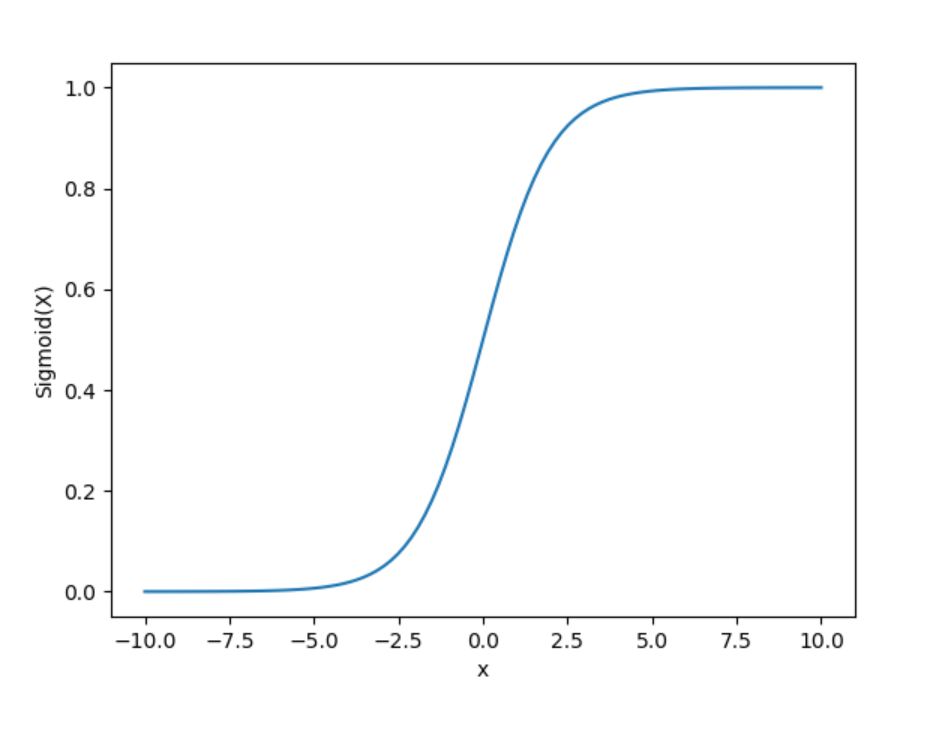

* ReLU
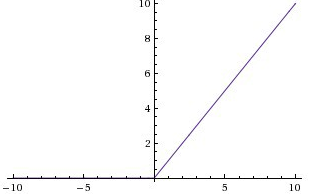

* Hyperbolic tangent tanh
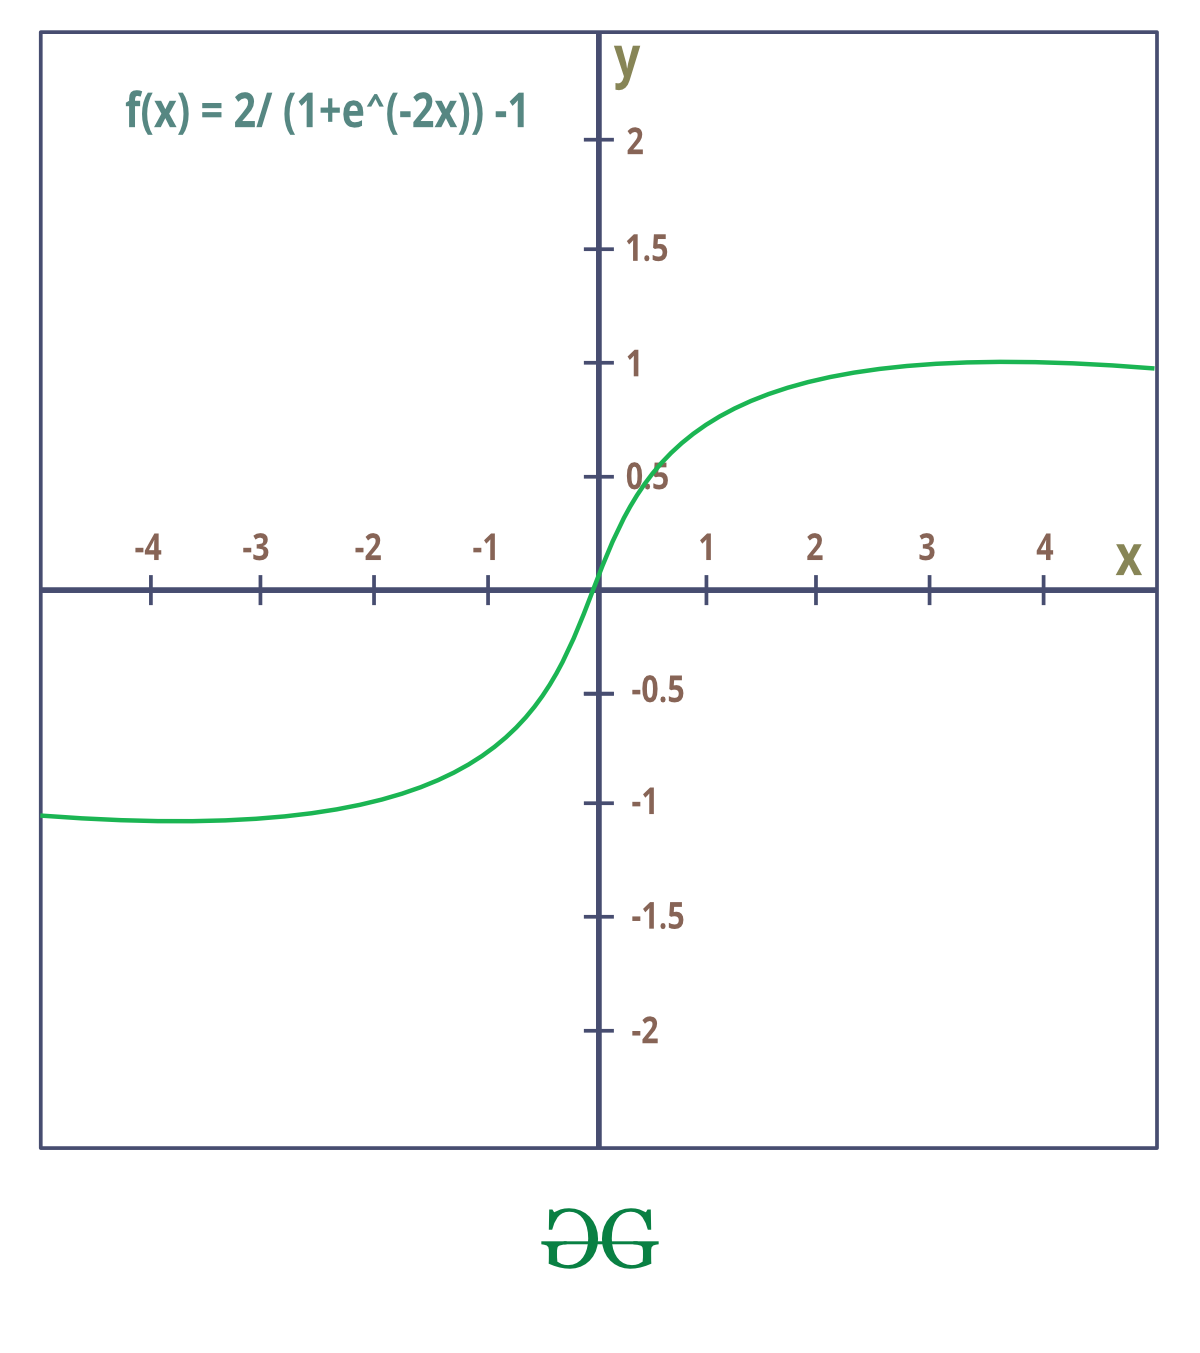

* ELU
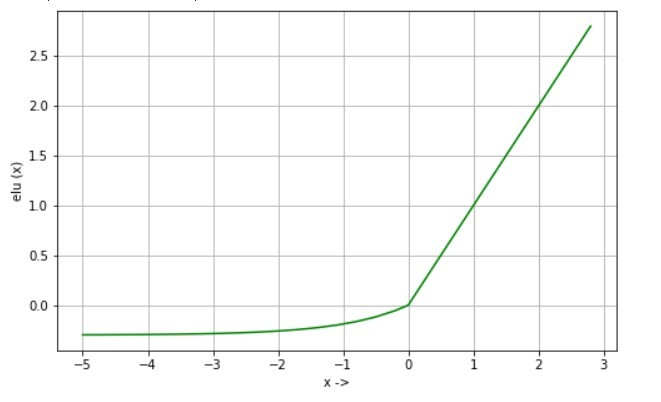

* SeLU
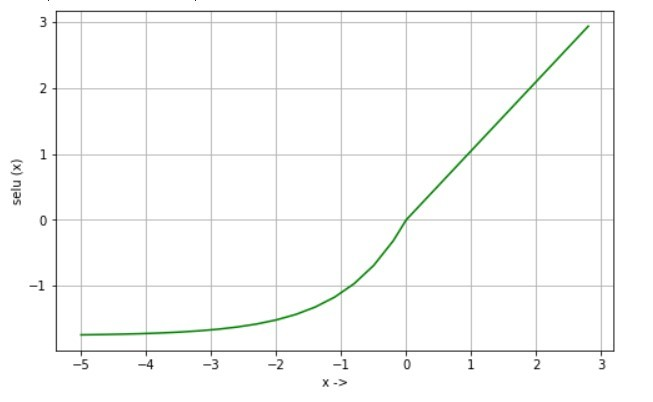

* Softmax
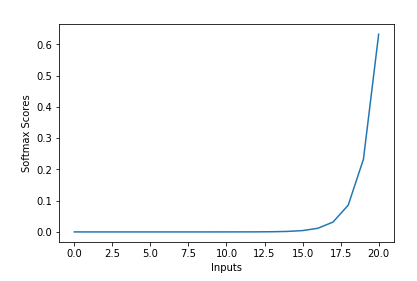


#### Q4. Suppose you have an MLP composed of one input layer with 10 passthrough neurons,
followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3
artificial neurons. All artificial neurons use the ReLU activation function.
* What is the shape of the input matrix X?
* What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector bh?
* What is the shape of the output layer’s weight vector Wo, and its bias vector bo?
* What is the shape of the network’s output matrix Y?
* Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo and bo.

**Ans.** 
* Shape of input matrix X: `m x 10`
* Shape of of the hidden layer’s weight vector Wh: `10 x 50` 
* Shape of the hidden layer’s bias vector bh: `50 x 1`
* Shape of output matrix Y: `m x 3`
* Equation of output matrix Y: `Y = relu(X × Wh + bh) * Wa + b0`

#### Q5. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function?

**Ans.** 
* You just need one neuron in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the logistic activation function in the output layer when estimating a probability.
* In most cases, you can use the ReLU activation function in the hidden layers. It is a bit faster to compute than other activation functions, and Gradient Descent does not get stuck as much on plateaus, thanks to the fact that it does not saturate for large input values (as opposed to the logistic function or the hyperbolic tangent function, which saturate at 1). For the output layer, logistic for binary classification, softmax for multiclass classification, or no activation function for regression.
* You need 10 neurons in the output layer, and you must use the softmax activation function, which can handle multiple classes, outputting one probability per class.

#### Q6. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

**Ans.** 

Backpropagation is a technique used to train artificial neural networks.
It first makes a prediction and computes the error, then goes through each layer in reverse to measure the error contribution of every model parameter (all the weights and biases). Finally, it performs a Gradient Descent step using these gradients (it slightly tweaks connection weights to reduce error).
This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that minimize the cost function.
To compute the gradients, backpropagation uses reverse-mode autodiff. Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once.  the difference Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is a simply a technique to compute gradients efficiently, and it happens to be used by backpropagation.

#### Q7. Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

**Ans.** 
number of hidden layers
number of neurons in each hidden layer
activation function used in each hidden layer and in the output layer
the weight initialization logic
If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.


#### Q8. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).

**Ans.** Done in google colab.

In [1]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# Build the MLP model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 22s 7ms/step - loss: 0.2961 - accuracy: 0.9142 - val_loss: 0.1387 - val_accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1443 - accuracy: 0.9578 - val_loss: 0.0971 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1083 - accuracy: 0.9675 - val_loss: 0.0898 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0887 - accuracy: 0.9728 - val_loss: 0.0814 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0762 - accuracy: 0.9761 - val_loss: 0.0766 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0677 - accuracy: 0.9781 - val_loss: 0.0666 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0699 - val_ac

In [2]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0714 - accuracy: 0.9789 - 1s/epoch - 4ms/step
Test accuracy: 0.9789000153541565


In [3]:
# Save checkpoints
checkpoint_path = "model_checkpoint/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [4]:
# Train the model with checkpointing
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), callbacks=[cp_callback])

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.9864
Epoch 1: saving model to model_checkpoint\cp.ckpt
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0405 - accuracy: 0.9865 - val_loss: 0.0632 - val_accuracy: 0.9808
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0384 - accuracy: 0.9867
Epoch 2: saving model to model_checkpoint\cp.ckpt
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0383 - accuracy: 0.9867 - val_loss: 0.0686 - val_accuracy: 0.9806
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0360 - accuracy: 0.9877
Epoch 3: saving model to model_checkpoint\cp.ckpt
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0361 - accuracy: 0.9877 - val_loss: 0.0722 - val_accuracy: 0.9790
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0340 - accuracy: 0.9885
Epoch 4: saving model to model_checkpoint\cp.ckpt
1875/1

In [5]:
# Restore the last checkpoint
latest_checkpoint = tf.train.latest_checkpoint("model_checkpoint/")
model.load_weights(latest_checkpoint)

In [6]:
# Add summaries
log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [7]:
# Train the model with summaries
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0267 - accuracy: 0.9905 - val_loss: 0.0847 - val_accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0240 - accuracy: 0.9915 - val_loss: 0.0778 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0227 - accuracy: 0.9919 - val_loss: 0.0812 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.0807 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0216 - accuracy: 0.9926 - val_loss: 0.0909 - val_accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9919 - val_loss: 0.0884 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0210 - accuracy: 0.9926 - val_loss: 0.0922 - val_accuracy